In [6]:
import pandas as pd
import numpy as np
import os
import tqdm
from os import listdir
import librosa
import soundfile as sf
import shutil

In [7]:

directory = "C:/Users/mahii/OneDrive/Desktop/practice/MajorProject/Respiratory sounds/audio_and_txt_files"


In [8]:
content = listdir(directory)

In [9]:
print(content)

['101_1b1_Al_sc_Meditron.txt', '101_1b1_Al_sc_Meditron.wav', '101_1b1_Pr_sc_Meditron.txt', '101_1b1_Pr_sc_Meditron.wav', '102_1b1_Ar_sc_Meditron.txt', '102_1b1_Ar_sc_Meditron.wav', '103_2b2_Ar_mc_LittC2SE.txt', '103_2b2_Ar_mc_LittC2SE.wav', '104_1b1_Al_sc_Litt3200.txt', '104_1b1_Al_sc_Litt3200.wav', '104_1b1_Ar_sc_Litt3200.txt', '104_1b1_Ar_sc_Litt3200.wav', '104_1b1_Ll_sc_Litt3200.txt', '104_1b1_Ll_sc_Litt3200.wav', '104_1b1_Lr_sc_Litt3200.txt', '104_1b1_Lr_sc_Litt3200.wav', '104_1b1_Pl_sc_Litt3200.txt', '104_1b1_Pl_sc_Litt3200.wav', '104_1b1_Pr_sc_Litt3200.txt', '104_1b1_Pr_sc_Litt3200.wav', '105_1b1_Tc_sc_Meditron.txt', '105_1b1_Tc_sc_Meditron.wav', '106_2b1_Pl_mc_LittC2SE.txt', '106_2b1_Pl_mc_LittC2SE.wav', '106_2b1_Pr_mc_LittC2SE.txt', '106_2b1_Pr_mc_LittC2SE.wav', '107_2b3_Al_mc_AKGC417L.txt', '107_2b3_Al_mc_AKGC417L.wav', '107_2b3_Ar_mc_AKGC417L.txt', '107_2b3_Ar_mc_AKGC417L.wav', '107_2b3_Ll_mc_AKGC417L.txt', '107_2b3_Ll_mc_AKGC417L.wav', '107_2b3_Lr_mc_AKGC417L.txt', '107_2b3_

In [10]:
patient_lung_data = []
l = [s for s in content if '.txt' in s]
for i in l:
  for lines in open(directory+'/'+i,'r').readlines():
    patient_lung_data.append([i.split('.')[0].split("_")[0],i.split('.')[0],lines.split()[0],lines.split()[1],lines.split()[2],lines.split()[3]])

In [11]:
k = 0
for m in patient_lung_data:
  if m[0] == '151':
    k += 1




In [12]:
def patient(x):
  patient_list = []
  patient_id = x.split('.')[0].split("_")[0]
  recording_index = x.split('.')[0].split("_")[1]
  chest_location = x.split('.')[0].split("_")[2]
  acquisition_mode = x.split('.')[0].split("_")[3]
  recording_equipment = x.split('.')[0].split("_")[4]
  filename = x.split('.')[0]

  patient_list.append(patient_id)
  patient_list.append(recording_index)
  patient_list.append(chest_location)
  patient_list.append(acquisition_mode)
  patient_list.append(recording_equipment)
  patient_list.append(filename)

  return patient_list



In [13]:

df = [patient(s) for s in content if '.txt' in s]
df

[['101', '1b1', 'Al', 'sc', 'Meditron', '101_1b1_Al_sc_Meditron'],
 ['101', '1b1', 'Pr', 'sc', 'Meditron', '101_1b1_Pr_sc_Meditron'],
 ['102', '1b1', 'Ar', 'sc', 'Meditron', '102_1b1_Ar_sc_Meditron'],
 ['103', '2b2', 'Ar', 'mc', 'LittC2SE', '103_2b2_Ar_mc_LittC2SE'],
 ['104', '1b1', 'Al', 'sc', 'Litt3200', '104_1b1_Al_sc_Litt3200'],
 ['104', '1b1', 'Ar', 'sc', 'Litt3200', '104_1b1_Ar_sc_Litt3200'],
 ['104', '1b1', 'Ll', 'sc', 'Litt3200', '104_1b1_Ll_sc_Litt3200'],
 ['104', '1b1', 'Lr', 'sc', 'Litt3200', '104_1b1_Lr_sc_Litt3200'],
 ['104', '1b1', 'Pl', 'sc', 'Litt3200', '104_1b1_Pl_sc_Litt3200'],
 ['104', '1b1', 'Pr', 'sc', 'Litt3200', '104_1b1_Pr_sc_Litt3200'],
 ['105', '1b1', 'Tc', 'sc', 'Meditron', '105_1b1_Tc_sc_Meditron'],
 ['106', '2b1', 'Pl', 'mc', 'LittC2SE', '106_2b1_Pl_mc_LittC2SE'],
 ['106', '2b1', 'Pr', 'mc', 'LittC2SE', '106_2b1_Pr_mc_LittC2SE'],
 ['107', '2b3', 'Al', 'mc', 'AKGC417L', '107_2b3_Al_mc_AKGC417L'],
 ['107', '2b3', 'Ar', 'mc', 'AKGC417L', '107_2b3_Ar_mc_AKGC417

In [14]:
data = pd.DataFrame(df)

In [15]:
data.head()

,0,1,2,3,4,5
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron
1,101,1b1,Pr,sc,Meditron,101_1b1_Pr_sc_Meditron
2,102,1b1,Ar,sc,Meditron,102_1b1_Ar_sc_Meditron
3,103,2b2,Ar,mc,LittC2SE,103_2b2_Ar_mc_LittC2SE
4,104,1b1,Al,sc,Litt3200,104_1b1_Al_sc_Litt3200


In [16]:
data.columns = ['patient_id','recording_index','chest_location','acquisition_mode','recording_equipment' ,'filename']

In [17]:
data.head()

,patient_id,recording_index,chest_location,acquisition_mode,recording_equipment,filename
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron
1,101,1b1,Pr,sc,Meditron,101_1b1_Pr_sc_Meditron
2,102,1b1,Ar,sc,Meditron,102_1b1_Ar_sc_Meditron
3,103,2b2,Ar,mc,LittC2SE,103_2b2_Ar_mc_LittC2SE
4,104,1b1,Al,sc,Litt3200,104_1b1_Al_sc_Litt3200


In [18]:
data['chest_location'].unique()

array(['Al', 'Pr', 'Ar', 'Ll', 'Lr', 'Pl', 'Tc'], dtype=object)

In [19]:
data['recording_equipment'].unique()

array(['Meditron', 'LittC2SE', 'Litt3200', 'AKGC417L'], dtype=object)

In [20]:
data['recording_index'].unique()

array(['1b1', '2b2', '2b1', '2b3', '2b4', '2b5', '3p2', '1p1', '1b2',
       '1b3', '1b4', '1p2', '1p3', '1p4', '2p3', '2p5', '3b3', '3b4',
       '3p3', '3p4', '2p2', '2p4', '3b2', '8p3', '4b4', '5b3', '8b3',
       '1b5', '1b6', '7b3', '6p1', '7p5', '4b2', '1p5'], dtype=object)

In [21]:
print(data[data['patient_id']== '151'])

    patient_id recording_index chest_location acquisition_mode  \
308        151             2p2             Al               mc   
309        151             2p2             Ar               mc   
310        151             2p2             Ll               mc   
311        151             2p2             Lr               mc   
312        151             2p2             Pl               mc   
313        151             2p2             Pr               mc   
314        151             2p2             Tc               mc   
315        151             2p3             Al               mc   
316        151             2p3             Ar               mc   
317        151             2p3             Ll               mc   
318        151             2p3             Lr               mc   
319        151             2p3             Pl               mc   
320        151             2p3             Pr               mc   
321        151             2p3             Tc               mc   
322       

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           920 non-null    object
 1   recording_index      920 non-null    object
 2   chest_location       920 non-null    object
 3   acquisition_mode     920 non-null    object
 4   recording_equipment  920 non-null    object
 5   filename             920 non-null    object
dtypes: object(6)
memory usage: 43.3+ KB


In [23]:
data[:10]

,patient_id,recording_index,chest_location,acquisition_mode,recording_equipment,filename
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron
1,101,1b1,Pr,sc,Meditron,101_1b1_Pr_sc_Meditron
2,102,1b1,Ar,sc,Meditron,102_1b1_Ar_sc_Meditron
3,103,2b2,Ar,mc,LittC2SE,103_2b2_Ar_mc_LittC2SE
4,104,1b1,Al,sc,Litt3200,104_1b1_Al_sc_Litt3200
5,104,1b1,Ar,sc,Litt3200,104_1b1_Ar_sc_Litt3200
6,104,1b1,Ll,sc,Litt3200,104_1b1_Ll_sc_Litt3200
7,104,1b1,Lr,sc,Litt3200,104_1b1_Lr_sc_Litt3200
8,104,1b1,Pl,sc,Litt3200,104_1b1_Pl_sc_Litt3200
9,104,1b1,Pr,sc,Litt3200,104_1b1_Pr_sc_Litt3200


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           920 non-null    object
 1   recording_index      920 non-null    object
 2   chest_location       920 non-null    object
 3   acquisition_mode     920 non-null    object
 4   recording_equipment  920 non-null    object
 5   filename             920 non-null    object
dtypes: object(6)
memory usage: 43.3+ KB


In [25]:
lung_data = pd.DataFrame(patient_lung_data)
lung_data.head()

,0,1,2,3,4,5
0,101,101_1b1_Al_sc_Meditron,0.036,0.579,0,0
1,101,101_1b1_Al_sc_Meditron,0.579,2.45,0,0
2,101,101_1b1_Al_sc_Meditron,2.45,3.893,0,0
3,101,101_1b1_Al_sc_Meditron,3.893,5.793,0,0
4,101,101_1b1_Al_sc_Meditron,5.793,7.521,0,0


In [26]:
lung_data.columns = ['patient_id','filename','start','end','crackles','wheezes']

In [27]:
lung_data.head(10)

,patient_id,filename,start,end,crackles,wheezes
0,101,101_1b1_Al_sc_Meditron,0.036,0.579,0,0
1,101,101_1b1_Al_sc_Meditron,0.579,2.45,0,0
2,101,101_1b1_Al_sc_Meditron,2.45,3.893,0,0
3,101,101_1b1_Al_sc_Meditron,3.893,5.793,0,0
4,101,101_1b1_Al_sc_Meditron,5.793,7.521,0,0
5,101,101_1b1_Al_sc_Meditron,7.521,9.279,0,0
6,101,101_1b1_Al_sc_Meditron,9.279,11.15,0,0
7,101,101_1b1_Al_sc_Meditron,11.15,13.036,0,0
8,101,101_1b1_Al_sc_Meditron,13.036,14.721,0,0
9,101,101_1b1_Al_sc_Meditron,14.721,16.707,0,0


In [28]:
datax = pd.concat([data,lung_data], join = 'inner', axis = 1)

In [29]:
datax

,patient_id,recording_index,chest_location,acquisition_mode,recording_equipment,filename,patient_id,filename,start,end,crackles,wheezes
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,101_1b1_Al_sc_Meditron,0.036,0.579,0,0
1,101,1b1,Pr,sc,Meditron,101_1b1_Pr_sc_Meditron,101,101_1b1_Al_sc_Meditron,0.579,2.45,0,0
2,102,1b1,Ar,sc,Meditron,102_1b1_Ar_sc_Meditron,101,101_1b1_Al_sc_Meditron,2.45,3.893,0,0
3,103,2b2,Ar,mc,LittC2SE,103_2b2_Ar_mc_LittC2SE,101,101_1b1_Al_sc_Meditron,3.893,5.793,0,0
4,104,1b1,Al,sc,Litt3200,104_1b1_Al_sc_Litt3200,101,101_1b1_Al_sc_Meditron,5.793,7.521,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
915,224,1b2,Al,sc,Meditron,224_1b2_Al_sc_Meditron,122,122_2b3_Tc_mc_LittC2SE,16.607,19.993,0,0
916,225,1b1,Pl,sc,Meditron,225_1b1_Pl_sc_Meditron,123,123_1b1_Al_sc_Meditron,0.45,2.979,0,0
917,226,1b1,Al,sc,Meditron,226_1b1_Al_sc_Meditron,123,123_1b1_Al_sc_Meditron,2.979,5.593,0,0
918,226,1b1,Ll,sc,Meditron,226_1b1_Ll_sc_Meditron,123,123_1b1_Al_sc_Meditron,5.593,8.207,0,0


In [30]:
datay = data.merge(lung_data, how = 'outer',on = 'patient_id' and  'filename')
datay

,patient_id_x,recording_index,chest_location,acquisition_mode,recording_equipment,filename,patient_id_y,start,end,crackles,wheezes
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.036,0.579,0,0
1,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.579,2.45,0,0
2,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,2.45,3.893,0,0
3,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,3.893,5.793,0,0
4,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,5.793,7.521,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6893,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,11.721,13.693,1,0
6894,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,13.693,15.536,0,0
6895,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,15.536,17.493,0,0
6896,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,17.493,19.436,1,0


In [31]:
datay[datay['patient_id_x'] == '160'].head(15)

,patient_id_x,recording_index,chest_location,acquisition_mode,recording_equipment,filename,patient_id_y,start,end,crackles,wheezes
3349,160,1b2,Al,mc,AKGC417L,160_1b2_Al_mc_AKGC417L,160,0.109,4.766,1,1
3350,160,1b2,Al,mc,AKGC417L,160_1b2_Al_mc_AKGC417L,160,4.766,10.342,1,1
3351,160,1b2,Ar,mc,AKGC417L,160_1b2_Ar_mc_AKGC417L,160,0.109,4.766,0,1
3352,160,1b2,Ar,mc,AKGC417L,160_1b2_Ar_mc_AKGC417L,160,4.766,10.342,0,1
3353,160,1b2,Lr,mc,AKGC417L,160_1b2_Lr_mc_AKGC417L,160,0.109,4.766,1,0
3354,160,1b2,Lr,mc,AKGC417L,160_1b2_Lr_mc_AKGC417L,160,4.766,10.342,0,1
3355,160,1b2,Pl,mc,AKGC417L,160_1b2_Pl_mc_AKGC417L,160,0.109,4.766,0,1
3356,160,1b2,Pl,mc,AKGC417L,160_1b2_Pl_mc_AKGC417L,160,4.766,10.342,0,1
3357,160,1b2,Pr,mc,AKGC417L,160_1b2_Pr_mc_AKGC417L,160,0.109,4.766,1,1
3358,160,1b2,Pr,mc,AKGC417L,160_1b2_Pr_mc_AKGC417L,160,4.766,10.342,0,1


In [32]:
datay.drop_duplicates()

,patient_id_x,recording_index,chest_location,acquisition_mode,recording_equipment,filename,patient_id_y,start,end,crackles,wheezes
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.036,0.579,0,0
1,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,0.579,2.45,0,0
2,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,2.45,3.893,0,0
3,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,3.893,5.793,0,0
4,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,101,5.793,7.521,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6893,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,11.721,13.693,1,0
6894,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,13.693,15.536,0,0
6895,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,15.536,17.493,0,0
6896,226,1b1,Pl,sc,LittC2SE,226_1b1_Pl_sc_LittC2SE,226,17.493,19.436,1,0


In [33]:
patient_demographic = pd.read_csv('C:/Users/mahii/OneDrive/Desktop/practice/MajorProject/Respiratory sounds/patient_diagnosis.csv')
patient_demographic.head(10)

,101,URTI
0,102,Healthy
1,103,Asthma
2,104,COPD
3,105,URTI
4,106,COPD
5,107,COPD
6,108,LRTI
7,109,COPD
8,110,COPD
9,111,Bronchiectasis


In [34]:
patient_demographic.columns = ['patient_id','disease']

In [35]:
patient_demographic.head()

,patient_id,disease
0,102,Healthy
1,103,Asthma
2,104,COPD
3,105,URTI
4,106,COPD


In [36]:
patient_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  125 non-null    int64 
 1   disease     125 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


In [37]:
c1 = pd.DataFrame({'patient_id':[101],
                   'disease':['URTI']})
c1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  1 non-null      int64 
 1   disease     1 non-null      object
dtypes: int64(1), object(1)
memory usage: 148.0+ bytes


In [38]:
patient_demographic = pd.concat([patient_demographic,c1])

In [39]:
patient_demographic['patient_id'].unique()

array([102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114,
       115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127,
       128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166,
       167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179,
       180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192,
       193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218,
       219, 220, 221, 222, 223, 224, 225, 226, 101], dtype=int64)

In [40]:
datay = datay.drop('patient_id_y',axis= 1)

In [41]:
datay.rename(columns = {'patient_id_x':'patient_id'}, inplace = True)

In [42]:
datay.head()

,patient_id,recording_index,chest_location,acquisition_mode,recording_equipment,filename,start,end,crackles,wheezes
0,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,0.036,0.579,0,0
1,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,0.579,2.45,0,0
2,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,2.45,3.893,0,0
3,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,3.893,5.793,0,0
4,101,1b1,Al,sc,Meditron,101_1b1_Al_sc_Meditron,5.793,7.521,0,0


In [43]:
daty = datay.convert_dtypes()

In [44]:
datay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   patient_id           6898 non-null   object
 1   recording_index      6898 non-null   object
 2   chest_location       6898 non-null   object
 3   acquisition_mode     6898 non-null   object
 4   recording_equipment  6898 non-null   object
 5   filename             6898 non-null   object
 6   start                6898 non-null   object
 7   end                  6898 non-null   object
 8   crackles             6898 non-null   object
 9   wheezes              6898 non-null   object
dtypes: object(10)
memory usage: 539.0+ KB


In [45]:
datay['patient_id'] = datay['patient_id'].astype('int64')

In [46]:
datay['patient_id'].dtype

dtype('int64')

In [47]:
patient_demographic[patient_demographic['patient_id'] == 101]

,patient_id,disease
0,101,URTI


In [48]:
datay['start'] = datay['start'].astype('float64')
datay['end'] = datay['end'].astype('float64')
datay['crackles'] = datay['crackles'].astype('int64')
datay['wheezes'] = datay['wheezes'].astype('int64')

In [49]:
datay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           6898 non-null   int64  
 1   recording_index      6898 non-null   object 
 2   chest_location       6898 non-null   object 
 3   acquisition_mode     6898 non-null   object 
 4   recording_equipment  6898 non-null   object 
 5   filename             6898 non-null   object 
 6   start                6898 non-null   float64
 7   end                  6898 non-null   float64
 8   crackles             6898 non-null   int64  
 9   wheezes              6898 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 539.0+ KB


In [50]:
def recording_to_clips(root, start, end, sr = 44100):

  maximum_index = len(root)
  start_index = min(int(start*sr), maximum_index)
  end_index = min(int(end*sr), maximum_index)
  return root[start_index:end_index]

In [63]:
os.makedirs('/content/sample_data/processed_clips')

In [65]:
i = 0
n = 0
for index, rows in tqdm.tqdm(datay.iterrows()):
  max_length = 6
  start_time = rows['start']
  end_time = rows['end']
  filename = rows['filename']

  if end_time - start_time > max_length:
    end = start_time + max_length

  audio_file_path = directory + '/' + filename + '.wav'

  if index > 0:
    if datay.iloc[index-1]['filename'] == filename:
      i += 1
    else:
      i = 0

  filename = filename + '_' + str(i) + '.wav'
  save_path = '/content/sample_data/processed_clips/'+filename
  n += 1

  audio, sample_rate = librosa.load(audio_file_path)
  sample = recording_to_clips(audio,start_time,end_time,sample_rate)

  required_length = max( 6*sample_rate, len(sample))
  padded_data = librosa.util.pad_center(sample,size = required_length)

  sf.write(file = save_path,data = padded_data, samplerate = sample_rate)

  # print('total files processed:', n)

0it [00:00, ?it/s]

6898it [04:10, 27.53it/s]


In [66]:
path = '/content/sample_data/processed_clips/'


In [67]:
lll = [[s.split("_")[0],s] for s in os.listdir(path = path)]
patient_data = pd.DataFrame(lll,columns = ['patient_id','filename'])
patient_data

,patient_id,filename
0,101,101_1b1_Al_sc_Meditron_0.wav
1,101,101_1b1_Al_sc_Meditron_1.wav
2,101,101_1b1_Al_sc_Meditron_10.wav
3,101,101_1b1_Al_sc_Meditron_11.wav
4,101,101_1b1_Al_sc_Meditron_2.wav
...,...,...
6893,226,226_1b1_Pl_sc_LittC2SE_5.wav
6894,226,226_1b1_Pl_sc_LittC2SE_6.wav
6895,226,226_1b1_Pl_sc_LittC2SE_7.wav
6896,226,226_1b1_Pl_sc_LittC2SE_8.wav


In [68]:
patient_data['patient_id'] = patient_data['patient_id'].astype('int64')

In [69]:
patient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6898 entries, 0 to 6897
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   patient_id  6898 non-null   int64 
 1   filename    6898 non-null   object
dtypes: int64(1), object(1)
memory usage: 107.9+ KB


In [70]:
final_data = patient_data.merge(patient_demographic, how = 'outer', on = 'patient_id')
final_data

,patient_id,filename,disease
0,101,101_1b1_Al_sc_Meditron_0.wav,URTI
1,101,101_1b1_Al_sc_Meditron_1.wav,URTI
2,101,101_1b1_Al_sc_Meditron_10.wav,URTI
3,101,101_1b1_Al_sc_Meditron_11.wav,URTI
4,101,101_1b1_Al_sc_Meditron_2.wav,URTI
...,...,...,...
6893,226,226_1b1_Pl_sc_LittC2SE_5.wav,Pneumonia
6894,226,226_1b1_Pl_sc_LittC2SE_6.wav,Pneumonia
6895,226,226_1b1_Pl_sc_LittC2SE_7.wav,Pneumonia
6896,226,226_1b1_Pl_sc_LittC2SE_8.wav,Pneumonia


In [71]:
final_data[['patient_id','disease']].value_counts()

patient_id  disease       
130         COPD              507
107         COPD              231
158         COPD              217
154         COPD              208
178         COPD              208
                             ... 
196         Bronchiectasis      6
189         COPD                5
128         COPD                5
209         Healthy             4
190         URTI                4
Name: count, Length: 126, dtype: int64

In [72]:
import sklearn as sk
from sklearn.model_selection import train_test_split

In [73]:
X_train,X_test, Y_train, Y_test = train_test_split(final_data, final_data['disease'],stratify  = final_data['disease'], random_state = 43, test_size = 0.25)

In [74]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(5173, 3)
(5173,)
(1725, 3)
(1725,)


In [75]:
X_train.head()

,patient_id,filename,disease
157,107,107_2b3_Pl_mc_AKGC417L_2.wav,COPD
4901,186,186_2b3_Al_mc_AKGC417L_4.wav,COPD
6225,211,211_1p2_Ar_mc_AKGC417L_0.wav,COPD
6461,213,213_2p2_Pr_mc_AKGC417L_3.wav,COPD
294,107,107_3p2_Al_mc_AKGC417L_3.wav,COPD


In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

Y_train = le.fit_transform(Y_train)
Y_test = le.fit_transform(Y_test)

In [77]:
def feature_shape(feature):
  ushape = [np.shape(sub_list) for sub_list in feature]
  return set(ushape)


def feature_padding(feature):
  min_shape = min(sub_array.shape for sub_list in feature for sub_array in sub_list)
  print(min_shape, type(min_shape))
  # Padding each subarray to the minimum shape with zeros
  feature_padded = [[sub_array[:min_shape[0]] for sub_array in sub_list] for sub_list in feature]
  return feature_padded



In [78]:
def get_features_from_audio(path):
    soundArr,sample_rate= librosa.load(path)
    mfcc=librosa.feature.mfcc(y=soundArr,sr=sample_rate)
    cstft=librosa.feature.chroma_stft(y=soundArr,sr=sample_rate)
    mSpec=librosa.feature.melspectrogram(y=soundArr,sr=sample_rate)
    tone = librosa.feature.tonnetz(y=soundArr,sr=sample_rate)
    specCen = librosa.feature.spectral_centroid(y=soundArr,sr=sample_rate)

    return mfcc,cstft,mSpec,tone, specCen

In [79]:
root = '/content/sample_data/processed_clips/'
mfcc,cstft,mSpec=[],[],[]

for idx,row in tqdm.tqdm(X_test.iterrows()):
    path=root + row['filename']
    a,b,c,d,e=get_features_from_audio(path)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)

2it [00:01,  1.45it/s]c:\Users\mahii\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\pitch.py:101: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(
1725it [09:13,  3.12it/s]


In [80]:
print(feature_shape(mfcc))

{(20, 377), (20, 267), (20, 276), (20, 697), (20, 288), (20, 315), (20, 260), (20, 263), (20, 269), (20, 272), (20, 336), (20, 278), (20, 284), (20, 348), (20, 287), (20, 259), (20, 274), (20, 338), (20, 277), (20, 356)}


In [81]:
print(feature_shape(cstft))

{(12, 315), (12, 260), (12, 263), (12, 272), (12, 269), (12, 336), (12, 278), (12, 284), (12, 348), (12, 287), (12, 259), (12, 274), (12, 338), (12, 277), (12, 356), (12, 377), (12, 267), (12, 697), (12, 276), (12, 288)}


In [82]:
print(feature_shape(mSpec))

{(128, 377), (128, 267), (128, 697), (128, 276), (128, 288), (128, 315), (128, 260), (128, 263), (128, 269), (128, 272), (128, 278), (128, 336), (128, 287), (128, 284), (128, 348), (128, 259), (128, 274), (128, 338), (128, 277), (128, 356)}


In [83]:
mfcc_padded = feature_padding(mfcc)

(259,) <class 'tuple'>


In [84]:
cstft_padded = feature_padding(cstft)

(259,) <class 'tuple'>


In [85]:
mSpec_padded = feature_padding(mSpec)

(259,) <class 'tuple'>


In [86]:
mfcc_test = np.array(mfcc_padded)
cstft_test = np.array(cstft_padded)
mSpec_test = np.array(mSpec_padded)

print(f"mfcc: {mfcc_test.shape}")
print(f"cstft: {cstft_test.shape}")
print(f"mSpec: {mSpec_test.shape}")

mfcc: (1725, 20, 259)
cstft: (1725, 12, 259)
mSpec: (1725, 128, 259)


In [87]:
root = '/content/sample_data/processed_clips/'
mfcc,cstft,mSpec=[],[],[]

for idx,row in tqdm.tqdm(X_train.iterrows()):
    path=root + row['filename']
    a,b,c,d,e=get_features_from_audio(path)
    mfcc.append(a)
    cstft.append(b)
    mSpec.append(c)




5173it [22:32,  3.83it/s]


In [88]:
mfcc_shape = feature_shape(mfcc)
print(mfcc_shape)

{(20, 304), (20, 371), (20, 328), (20, 267), (20, 264), (20, 270), (20, 276), (20, 273), (20, 288), (20, 407), (20, 285), (20, 300), (20, 483), (20, 303), (20, 428), (20, 370), (20, 309), (20, 315), (20, 321), (20, 260), (20, 263), (20, 269), (20, 397), (20, 281), (20, 278), (20, 287), (20, 351), (20, 357), (20, 302), (20, 299), (20, 314), (20, 311), (20, 317), (20, 375), (20, 262), (20, 259), (20, 329), (20, 268), (20, 274), (20, 338), (20, 277), (20, 286), (20, 295), (20, 353), (20, 362), (20, 301)}


In [89]:
cstft_shape = feature_shape(cstft)
print(cstft_shape)

{(12, 483), (12, 303), (12, 428), (12, 370), (12, 309), (12, 315), (12, 260), (12, 263), (12, 321), (12, 397), (12, 269), (12, 281), (12, 278), (12, 287), (12, 351), (12, 357), (12, 299), (12, 302), (12, 311), (12, 317), (12, 375), (12, 262), (12, 314), (12, 259), (12, 329), (12, 268), (12, 274), (12, 338), (12, 277), (12, 286), (12, 353), (12, 362), (12, 301), (12, 295), (12, 304), (12, 371), (12, 267), (12, 264), (12, 270), (12, 328), (12, 273), (12, 276), (12, 407), (12, 285), (12, 288), (12, 300)}


In [90]:
mspec = feature_shape(mSpec)
print(mspec)

{(128, 264), (128, 328), (128, 267), (128, 273), (128, 270), (128, 276), (128, 285), (128, 288), (128, 407), (128, 300), (128, 370), (128, 309), (128, 428), (128, 483), (128, 303), (128, 315), (128, 321), (128, 260), (128, 263), (128, 269), (128, 278), (128, 397), (128, 281), (128, 287), (128, 351), (128, 299), (128, 357), (128, 302), (128, 311), (128, 375), (128, 314), (128, 259), (128, 317), (128, 262), (128, 329), (128, 268), (128, 274), (128, 338), (128, 277), (128, 286), (128, 295), (128, 353), (128, 304), (128, 362), (128, 301), (128, 371)}


In [91]:
mfcc_padded = feature_padding(mfcc)
cstft_padded = feature_padding(cstft)
mSpec_padded = feature_padding(mSpec)

(259,) <class 'tuple'>
(259,) <class 'tuple'>
(259,) <class 'tuple'>


In [92]:
mfcc_train = np.array(mfcc_padded)
cstft_train = np.array(cstft_padded)
mSpec_train = np.array(mSpec_padded)

print(mfcc_train.shape)
print(cstft_train.shape)
print(mSpec_train.shape)

(5173, 20, 259)
(5173, 12, 259)
(5173, 128, 259)


In [93]:
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

In [94]:
my_callbacks = [
    tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    verbose=1,
),
    tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=5,
    verbose=1,
    mode="min",
    min_lr=0.00001,
)
]

C:\Users\mahii\AppData\Local\Temp\ipykernel_3680\237117300.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = final_data['disease'],palette = "pastel")


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'URTI'),
  Text(1, 0, 'Healthy'),
  Text(2, 0, 'Asthma'),
  Text(3, 0, 'COPD'),
  Text(4, 0, 'LRTI'),
  Text(5, 0, 'Bronchiectasis'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Bronchiolitis')])

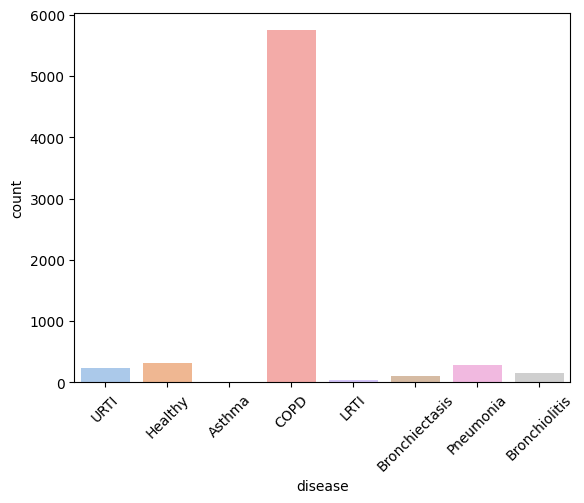

In [95]:
sns.countplot(x = final_data['disease'],palette = "pastel")
plt.xticks(rotation = 45)

C:\Users\mahii\AppData\Local\Temp\ipykernel_3680\3365851312.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = patient_demographic['disease'],palette = "pastel")


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Healthy'),
  Text(1, 0, 'Asthma'),
  Text(2, 0, 'COPD'),
  Text(3, 0, 'URTI'),
  Text(4, 0, 'LRTI'),
  Text(5, 0, 'Bronchiectasis'),
  Text(6, 0, 'Pneumonia'),
  Text(7, 0, 'Bronchiolitis')])

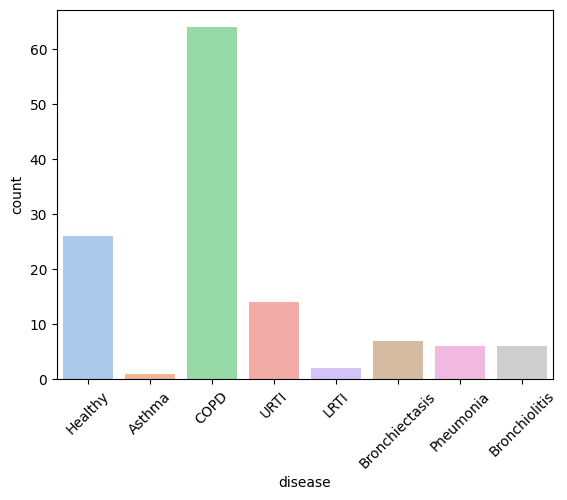

In [96]:
sns.countplot(x = patient_demographic['disease'],palette = "pastel")
plt.xticks(rotation = 45)

In [97]:
mfcc_input=keras.layers.Input(shape=(20,259,1),name="mfccInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mfcc_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mfcc_output=keras.layers.GlobalMaxPooling2D()(x)

mfcc_model=keras.Model(mfcc_input, mfcc_output, name="mfccModel")

In [98]:
mfcc_model.summary()

Model: "mfccModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mfccInput (InputLayer)          │ (None, 20, 259, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 20, 87, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 20, 87, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 20, 87, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 10, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 10, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 11, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 11, 96)      │        24,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 5, 11, 96)      │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 5, 11, 96)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 5, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 5, 128)      │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 2, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,560 (369.38 KB)

 Trainable params: 93,920 (366.88 KB)

 Non-trainable params: 640 (2.50 KB)

In [99]:
cstft_input=keras.layers.Input(shape=(12,259,1),name="cstftInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(cstft_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
cstft_output=keras.layers.GlobalMaxPooling2D()(x)

cstft_model=keras.Model(cstft_input, cstft_output, name="cstftModel")

In [100]:
cstft_model.summary()

Model: "cstftModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ cstftInput (InputLayer)         │ (None, 12, 259, 1)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 12, 87, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 12, 87, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 12, 87, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 43, 32)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 6, 22, 64)      │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 6, 22, 64)      │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 6, 22, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 3, 11, 64)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 3, 11, 96)      │        24,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 3, 11, 96)      │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_6 (Activation)       │ (None, 3, 11, 96)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 5, 96)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 1, 5, 128)      │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 1, 5, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 1, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,560 (369.38 KB)

 Trainable params: 93,920 (366.88 KB)

 Non-trainable params: 640 (2.50 KB)

In [101]:
mspec_input=keras.layers.Input(shape=(128,259,1),name="mspecInput")
x=keras.layers.Conv2D(32,5,strides=(1,3),padding='same')(mspec_input)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(64,3,strides=(1,2),padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(96,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
x=keras.layers.MaxPooling2D(pool_size=2,padding='valid')(x)

x=keras.layers.Conv2D(128,2,padding='same')(x)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Activation(keras.activations.relu)(x)
mspec_output=keras.layers.GlobalMaxPooling2D()(x)

mspec_model=keras.Model(mspec_input, mspec_output, name="mspecModel")



In [102]:
print(type(mspec_model))

<class 'keras.src.models.functional.Functional'>


In [103]:
mspec_model.summary()

Model: "mspecModel"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mspecInput (InputLayer)         │ (None, 128, 259, 1)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 128, 87, 32)    │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 128, 87, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 128, 87, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 64, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 64, 22, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 64, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 32, 11, 96)     │        24,672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 11, 96)     │           384 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 32, 11, 96)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 5, 96)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 5, 128)     │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 5, 128)     │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 16, 5, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_2          │ (None, 128)            │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 94,560 (369.38 KB)

 Trainable params: 93,920 (366.88 KB)

 Non-trainable params: 640 (2.50 KB)

In [104]:
input_mfcc=keras.layers.Input(shape=(20,259,1),name="mfcc")
mfcc=mfcc_model(input_mfcc)

input_cstft=keras.layers.Input(shape=(12,259,1),name="cstft")
cstft=cstft_model(input_cstft)

input_mSpec=keras.layers.Input(shape=(128,259,1),name="mspec")
mSpec=mspec_model(input_mSpec)


concat=keras.layers.concatenate([mfcc,cstft,mSpec])
hidden=keras.layers.Dropout(0.2)(concat)
hidden=keras.layers.Dense(50,activation='relu')(concat)
hidden=keras.layers.Dropout(0.3)(hidden)
hidden=keras.layers.Dense(25,activation='relu')(hidden)
hidden=keras.layers.Dropout(0.3)(hidden)
output=keras.layers.Dense(8,activation='softmax')(hidden)

net=keras.Model([input_mfcc,input_cstft,input_mSpec], output, name="Net")

In [105]:
print(type(mfcc))

<class 'keras.src.backend.common.keras_tensor.KerasTensor'>


In [106]:
net.summary()

Model: "Net"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ mfcc (InputLayer)   │ (None, 20, 259,   │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cstft (InputLayer)  │ (None, 12, 259,   │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mspec (InputLayer)  │ (None, 128, 259,  │          0 │ -                 │
│                     │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mfccModel           │ (None, 128)       │     94,560 │ mfcc[0][0]        │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ cstftModel          │ (None, 128)       │     94,560 │ cstft[0][0]       │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ mspecModel          │ (None, 128)       │     94,560 │ mspec[0][0]       │
│ (Functional)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 384)       │          0 │ mfccModel[0][0],  │
│ (Concatenate)       │                   │            │ cstftModel[0][0], │
│                     │                   │            │ mspecModel[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 50)        │     19,250 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 50)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 25)        │      1,275 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 25)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 8)         │        208 │ dropout_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 304,413 (1.16 MB)

 Trainable params: 302,493 (1.15 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [123]:
import keras
import tensorflow as tf

optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)

net.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
# tf.keras.backend.set_value(net.optimizer.learning_rate, 0.001)


In [125]:
history=net.fit(
    {"mfcc":mfcc_train,"cstft":cstft_train,"mspec":mSpec_train},
    Y_train,
    validation_data=({"mfcc":mfcc_test,"cstft":cstft_test,"mspec":mSpec_test},Y_test),
    epochs=100,verbose=1,
    callbacks=my_callbacks
)

Epoch 1/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 81s 401ms/step - accuracy: 0.7383 - loss: 0.9953 - val_accuracy: 0.8330 - val_loss: 0.8108 - learning_rate: 0.0010
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 60s 369ms/step - accuracy: 0.8274 - loss: 0.5198 - val_accuracy: 0.8394 - val_loss: 0.5605 - learning_rate: 0.0010
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 55s 339ms/step - accuracy: 0.8375 - loss: 0.4415 - val_accuracy: 0.8470 - val_loss: 0.3988 - learning_rate: 0.0010
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 56s 344ms/step - accuracy: 0.8518 - loss: 0.4271 - val_accuracy: 0.8545 - val_loss: 0.3630 - learning_rate: 0.0010
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 69s 427ms/step - accuracy: 0.8620 - loss: 0.3887 - val_accuracy: 0.8504 - val_loss: 0.4671 - learning_rate: 0.0010
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 104s 641ms/step - accuracy: 0.8574 - loss: 0.3665 - val_accuracy: 0.8678 - val_loss: 0.3597 - learning_rate: 0.0010
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 66s 409ms/step - accur

In [140]:
for i in mfcc_test:
    y_pred = net.predict(i)
    print(y_pred)

ValueError: Input 0 of layer "Net" is incompatible with the layer: expected shape=(None, 20, 259, 1), found shape=(20, 259)

In [144]:
from sklearn.metrics import accuracy_score, confusion_matrix

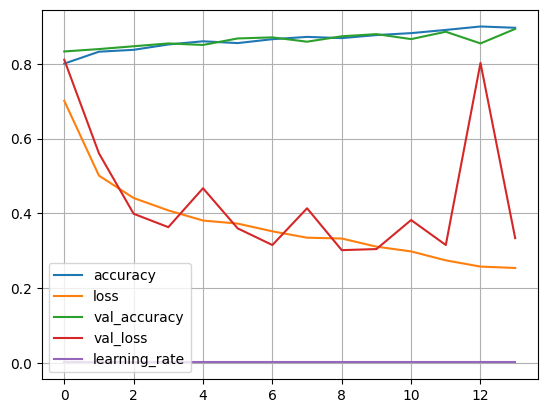

In [127]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.show()

In [131]:
input_mfcc=keras.layers.Input(shape=(20,259,1),name="mfcc")
mfcc=mfcc_model(input_mfcc)



hidden=keras.layers.Dropout(0.2)(mfcc)
hidden=keras.layers.Dense(50,activation='relu')(mfcc)
hidden=keras.layers.Dropout(0.3)(hidden)
hidden=keras.layers.Dense(25,activation='relu')(hidden)
hidden=keras.layers.Dropout(0.3)(hidden)
output=keras.layers.Dense(8,activation='softmax')(hidden)

net1=keras.Model(input_mfcc, output, name="Net")

In [132]:
optimizer = tf.keras.optimizers.Nadam(learning_rate=0.001)

net1.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [135]:
history1=net1.fit(
    mfcc_train,
    Y_train,
    validation_data=(mfcc_test,Y_test),
    epochs=100,verbose=1,
    callbacks=my_callbacks
)

Epoch 1/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 11s 52ms/step - accuracy: 0.5969 - loss: 1.3327 - val_accuracy: 0.8406 - val_loss: 0.3942 - learning_rate: 0.0010
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.8557 - loss: 0.4089 - val_accuracy: 0.8551 - val_loss: 0.5045 - learning_rate: 0.0010
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.8761 - loss: 0.3243 - val_accuracy: 0.9003 - val_loss: 0.2831 - learning_rate: 0.0010
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 47ms/step - accuracy: 0.8838 - loss: 0.3076 - val_accuracy: 0.8910 - val_loss: 0.3635 - learning_rate: 0.0010
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.9048 - loss: 0.2705 - val_accuracy: 0.9026 - val_loss: 0.2550 - learning_rate: 0.0010
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 8s 48ms/step - accuracy: 0.9065 - loss: 0.2534 - val_accuracy: 0.8771 - val_loss: 0.4675 - learning_rate: 0.0010
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 9s 58ms/step - accuracy: 0.9167 - 

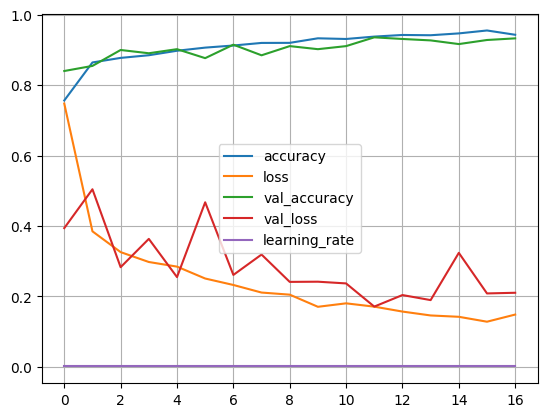

In [136]:
pd.DataFrame(history1.history).plot()
plt.grid(True)
plt.show()

In [141]:
y_pred1 = net1.predict(mfcc_test)

54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step


In [142]:
print(accuracy_score(y_pred1,Y_test))

ValueError: Classification metrics can't handle a mix of continuous-multioutput and multiclass targets

In [ ]:
shutil.rmtree('/content/sample_data/processed_clips')